# EXPLORACION DE LOS DATASETS

En este informe interactivo se realia una exploración de los datos proporcionados por cada uno de los conjuntos de datos elegidos. 

- Arrhytmia Dataset (mitbih)
- PTB Diagnostic ECG Database (ptbdb)

Tras esta exploración, se establece la primera aproximación a seguir a la hora del desarrollo de un sistema de machine learning que permita aprender a interpretar ECG.

## Importación de datos

Lectura de datos inicialmente divididos en conjuntos de entrenamiento y testeo. Concatenación y randomización de sendos conjuntos de datos para eliminar posible sesgo.

In [1]:
import random
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)
import os
print(os.listdir("/home/fylgja/catkin_ws/src/ECG_Heartbeat_Categorization/data/"))

mitbih_df_train = pd.read_csv("/home/fylgja/catkin_ws/src/ECG_Heartbeat_Categorization/data/mitbih_train.csv", header=None)
mitbih_df_test = pd.read_csv("/home/fylgja/catkin_ws/src/ECG_Heartbeat_Categorization/data/mitbih_test.csv", header=None)
mitbih_df = pd.concat([mitbih_df_train, mitbih_df_test], axis=0)

['mitbih_train.csv', 'mitbih_test.csv', 'ptbdb_normal.csv', 'ptbdb_abnormal.csv']


In [2]:
print(os.listdir("/home/fylgja/catkin_ws/src/ECG_Heartbeat_Categorization/data/"))

ptbdb_normal_df = pd.read_csv("/home/fylgja/catkin_ws/src/ECG_Heartbeat_Categorization/data/ptbdb_normal.csv", header=None)
ptbdb_abnormal_df = pd.read_csv("/home/fylgja/catkin_ws/src/ECG_Heartbeat_Categorization/data/ptbdb_abnormal.csv", header=None)
ptbdb_df = pd.concat([ptbdb_normal_df, ptbdb_abnormal_df], axis=0)

['mitbih_train.csv', 'mitbih_test.csv', 'ptbdb_normal.csv', 'ptbdb_abnormal.csv']


## Extraccion de clases y atributos

In [3]:
X_mitbih_model = mitbih_df.values[:, :-1]
y_mitbih_model = mitbih_df.values[:, -1].astype(int)

In [4]:
X_ptbdb_model = ptbdb_df.values[:, :-1]
y_ptbdb_model = ptbdb_df.values[:, -1].astype(int)

## Datos por clase

Debido a que ambos datasets están muy desbalanceados aparece la necesidad imperante de desarrollar un algoritmo de balanceado de datos de forma que:
- Aumente las clases minoritarias
- Disminuya la mayor clase

Propuesta para Arrhytmia Dataset:
- Aumentar las clases S y F hasta el valor de V
- Disminuir las demás clases hasta el valor de V

Propuesta para PTB Diagnostic ECG Database:
- Aumentar la clase Healthy hasta balancear el dataset.

El algoritmo deberá generar señales de forma artificial sin cambiar la morfología de la señal, por lo que habrá que estudiarlo en profundidad.

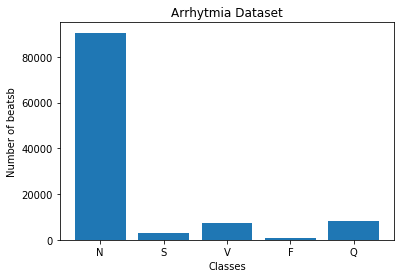

Arrhytmia Dataset: [N: 90589, S: 2779, V: 7236, F: 803, Q: 8039]


In [5]:
N = np.argwhere(y_mitbih_model == 0).flatten()
S = np.argwhere(y_mitbih_model == 1).flatten()
V = np.argwhere(y_mitbih_model == 2).flatten()
F = np.argwhere(y_mitbih_model == 3).flatten()
Q = np.argwhere(y_mitbih_model == 4).flatten()

x = np.arange(5)
plt.bar(x,[len(N), len(S), len(V), len(F), len(Q)])
plt.title("Arrhytmia Dataset")
plt.xticks(x, ('N', 'S', 'V', 'F', 'Q'))
plt.xlabel("Classes")
plt.ylabel("Number of beatsb")
plt.show()

print("Arrhytmia Dataset: [N: {}, S: {}, V: {}, F: {}, Q: {}]".format(len(N),len(S),len(V),len(F),len(Q)))

PTB Diagnostic ECG dataset: [LR: 4046, HR: 10506]


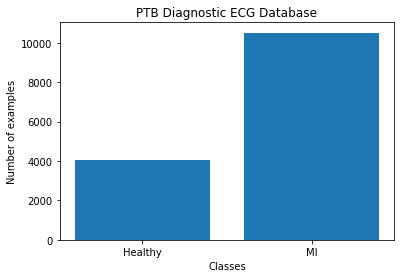

In [6]:
C0 = np.argwhere(y_ptbdb_model == 0).flatten()
C1 = np.argwhere(y_ptbdb_model == 1).flatten()
print("PTB Diagnostic ECG dataset: [LR: {}, HR: {}]".format(len(C0),len(C1)))

x = np.arange(2)
plt.bar(x,[len(C0), len(C1)])
plt.title("PTB Diagnostic ECG Database")
plt.xticks(x, ('Healthy', 'MI'))
plt.xlabel("Classes")
plt.ylabel("Number of examples")
plt.show()

## Análisis de generalización de señal

Se obtiene en primer lugar la media de las señales correspondientes a cada clase y se pasa a hacer un análisis estadístico y visual sobre la generalización a la hora de la categorización del conjunto de datos.

Conclusión: Se observan para ambos datasets que tanto visualmente como estadisticamente que existen diferencias suficientes entre las señales medias de cada clase como para realizar una clasificación mediante técnicas de machine learning. La diferencia entre las propias señales de cada clase determinarán la dificultad en la tarea de clasificación.

### Arrhytmia Dataset

In [7]:
mean_mitbih_df = mitbih_df.groupby(187).mean()
X_mean_mitbih_model = mean_mitbih_df.values[:, :]
mean_mitbih_df

0         1         2         3         4         5         6    \
187                                                                         
0    0.916029  0.778528  0.403738  0.177810  0.164331  0.180404  0.179823   
1    0.895905  0.780291  0.274322  0.091169  0.150147  0.185027  0.175478   
2    0.607483  0.596410  0.519297  0.419842  0.374790  0.366584  0.366825   
3    0.924229  0.868534  0.616566  0.347033  0.195851  0.170713  0.155011   
4    0.861454  0.665748  0.605911  0.541981  0.479104  0.419168  0.366519   

          7         8         9      ...          177       178       179  \
187                                  ...                                    
0    0.180355  0.182957  0.188079    ...     0.003066  0.002677  0.002401   
1    0.200809  0.225404  0.213805    ...     0.040679  0.040709  0.040829   
2    0.358750  0.339779  0.319970    ...     0.027960  0.025493  0.023323   
3    0.132041  0.120127  0.113829    ...     0.000234  0.000186  0.000123   
4    0.306997  0.244737  0.184032    ...     0.000013  0.000012  0.000010   

          180       181       182       183       184       185       186  
187                                                                        
0    0.002163  0.001976  0.001816  0.001661  0.001458  0.001277  0.001203  
1    0.039907  0.039144  0.038959  0.038657  0.038352  0.038150  0.037956  
2    0.021648  0.019403  0.017842  0.016823  0.015567  0.014059  0.013237  
3    0.000108  0.000053  0.000053  0.000033  0.000038  0.000018  0.000033  
4    0.000010  0.000011  0.000008  0.000000  0.000000  0.000000  0.000000  

[5 rows x 187 columns]

In [8]:
mean_mitbih_df.describe()

0         1         2         3         4         5         6    \
count  5.000000  5.000000  5.000000  5.000000  5.000000  5.000000  5.000000   
mean   0.841020  0.737902  0.483967  0.315567  0.272845  0.264379  0.248731   
std    0.132778  0.106932  0.144990  0.181974  0.146368  0.118877  0.108072   
min    0.607483  0.596410  0.274322  0.091169  0.150147  0.170713  0.155011   
25%    0.861454  0.665748  0.403738  0.177810  0.164331  0.180404  0.175478   
50%    0.895905  0.778528  0.519297  0.347033  0.195851  0.185027  0.179823   
75%    0.916029  0.780291  0.605911  0.419842  0.374790  0.366584  0.366519   
max    0.924229  0.868534  0.616566  0.541981  0.479104  0.419168  0.366825   

            7         8         9      ...          177       178       179  \
count  5.000000  5.000000  5.000000    ...     5.000000  5.000000  5.000000   
mean   0.235790  0.222601  0.203943    ...     0.014390  0.013815  0.013337   
std    0.093875  0.081088  0.074713    ...     0.018779  0.018439  0.018216   
min    0.132041  0.120127  0.113829    ...     0.000013  0.000012  0.000010   
25%    0.180355  0.182957  0.184032    ...     0.000234  0.000186  0.000123   
50%    0.200809  0.225404  0.188079    ...     0.003066  0.002677  0.002401   
75%    0.306997  0.244737  0.213805    ...     0.027960  0.025493  0.023323   
max    0.358750  0.339779  0.319970    ...     0.040679  0.040709  0.040829   

            180       181       182       183       184       185       186  
count  5.000000  5.000000  5.000000  5.000000  5.000000  5.000000  5.000000  
mean   0.012767  0.012117  0.011735  0.011435  0.011083  0.010701  0.010486  
std    0.017684  0.017164  0.016962  0.016781  0.016592  0.016448  0.016337  
min    0.000010  0.000011  0.000008  0.000000  0.000000  0.000000  0.000000  
25%    0.000108  0.000053  0.000053  0.000033  0.000038  0.000018  0.000033  
50%    0.002163  0.001976  0.001816  0.001661  0.001458  0.001277  0.001203  
75%    0.021648  0.019403  0.017842  0.016823  0.015567  0.014059  0.013237  
max    0.039907  0.039144  0.038959  0.038657  0.038352  0.038150  0.037956  

[8 rows x 187 columns]

Text(0, 0.5, 'Amplitude')

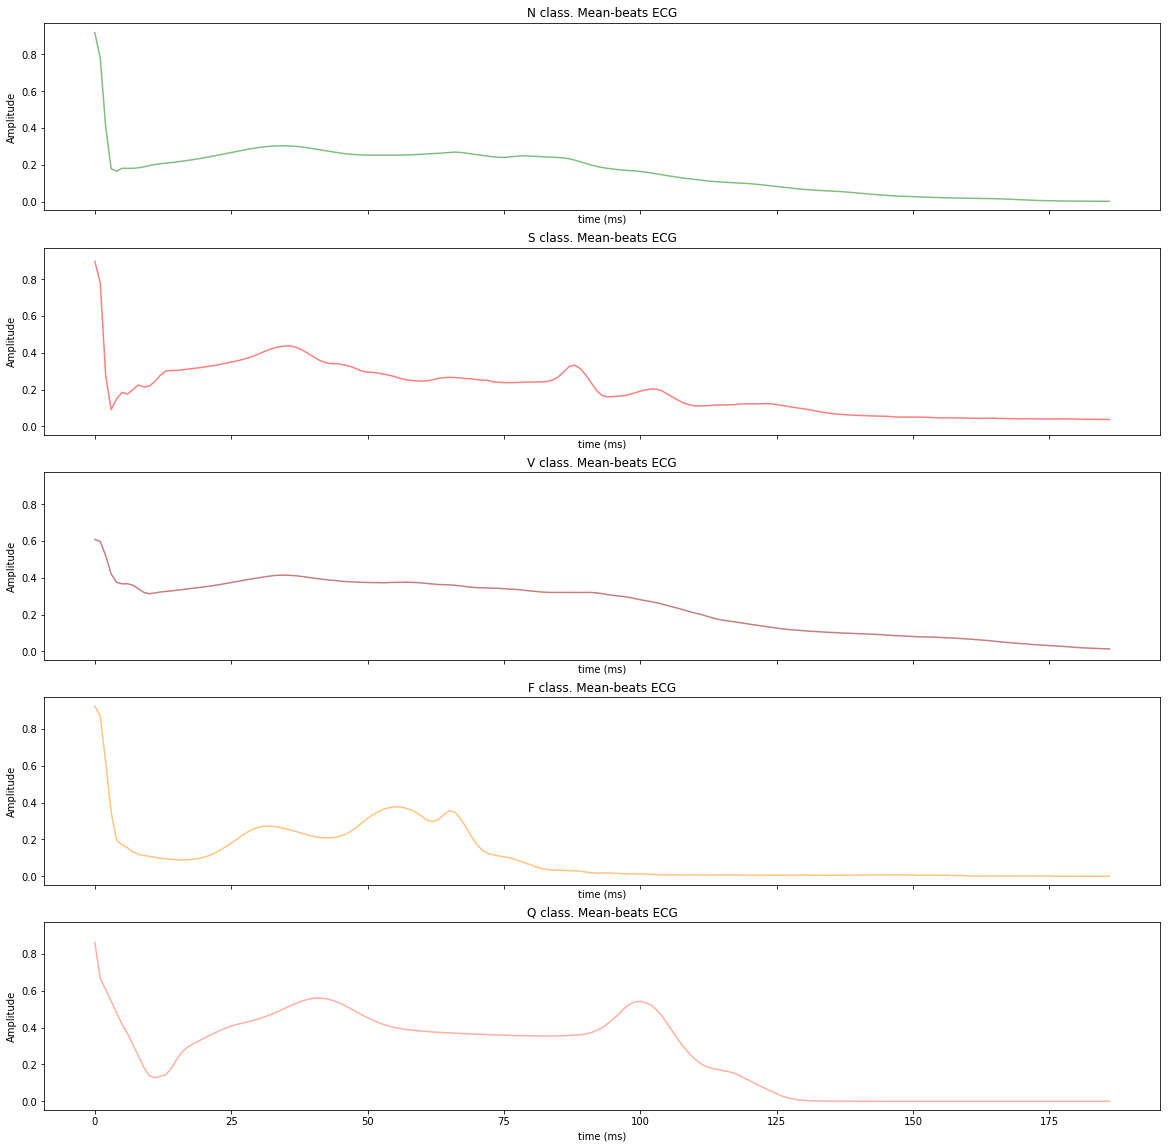

In [9]:
f, ax = plt.subplots(5, sharex=True, sharey=True, figsize=(20,20))

ax[0].set_title("N class. Mean-beats ECG")
ax[0].plot(X_mean_mitbih_model[0, :], color="green", alpha=.5)
ax[0].set_xlabel('time (ms)')
ax[0].set_ylabel('Amplitude')

ax[1].set_title("S class. Mean-beats ECG")
ax[1].plot(X_mean_mitbih_model[1, :], color="red", alpha=.5)
ax[1].set_xlabel('time (ms)')
ax[1].set_ylabel('Amplitude')

ax[2].set_title("V class. Mean-beats ECG")
ax[2].plot(X_mean_mitbih_model[2, :], color="darkred", alpha=.5)
ax[2].set_xlabel('time (ms)')
ax[2].set_ylabel('Amplitude')

ax[3].set_title("F class. Mean-beats ECG")
ax[3].plot(X_mean_mitbih_model[3, :], color="darkorange", alpha=.5)
ax[3].set_xlabel('time (ms)')
ax[3].set_ylabel('Amplitude')

ax[4].set_title("Q class. Mean-beats ECG")
ax[4].plot(X_mean_mitbih_model[4, :], color="tomato", alpha=.5)
ax[4].set_xlabel('time (ms)')
ax[4].set_ylabel('Amplitude')

### PTB Diagnostic ECG Dataset

In [10]:
mean_ptbdb_df = ptbdb_df.groupby(187).mean()
X_mean_ptbdb_model = mean_ptbdb_df.values[:, :]
mean_ptbdb_df

0         1         2         3         4         5         6    \
187                                                                         
0    0.979670  0.711486  0.311677  0.119575  0.088608  0.130843  0.159653   
1    0.975468  0.725582  0.438306  0.290384  0.252897  0.249423  0.245668   

          7         8         9   ...        177       178       179  \
187                               ...                                  
0    0.165608  0.168005  0.170783 ...   0.002151  0.001540  0.001332   
1    0.247160  0.250203  0.252396 ...   0.001146  0.001055  0.001057   

          180       181       182       183       184       185  186  
187                                                                   
0    0.001304  0.001220  0.000991  0.000894  0.000454  0.000474    0  
1    0.000744  0.000554  0.000533  0.000313  0.000070  0.000074    0  

[2 rows x 187 columns]

In [11]:
mean_ptbdb_df.describe()

0         1         2         3         4         5         6    \
count  2.000000  2.000000  2.000000  2.000000  2.000000  2.000000  2.000000   
mean   0.977569  0.718534  0.374992  0.204980  0.170752  0.190133  0.202660   
std    0.002971  0.009968  0.089541  0.120780  0.116170  0.083849  0.060822   
min    0.975468  0.711486  0.311677  0.119575  0.088608  0.130843  0.159653   
25%    0.976519  0.715010  0.343334  0.162277  0.129680  0.160488  0.181156   
50%    0.977569  0.718534  0.374992  0.204980  0.170752  0.190133  0.202660   
75%    0.978620  0.722058  0.406649  0.247682  0.211825  0.219778  0.224164   
max    0.979670  0.725582  0.438306  0.290384  0.252897  0.249423  0.245668   

            7         8         9   ...        177       178       179  \
count  2.000000  2.000000  2.000000 ...   2.000000  2.000000  2.000000   
mean   0.206384  0.209104  0.211589 ...   0.001648  0.001297  0.001194   
std    0.057666  0.058122  0.057709 ...   0.000711  0.000343  0.000194   
min    0.165608  0.168005  0.170783 ...   0.001146  0.001055  0.001057   
25%    0.185996  0.188555  0.191186 ...   0.001397  0.001176  0.001125   
50%    0.206384  0.209104  0.211589 ...   0.001648  0.001297  0.001194   
75%    0.226772  0.229653  0.231993 ...   0.001899  0.001418  0.001263   
max    0.247160  0.250203  0.252396 ...   0.002151  0.001540  0.001332   

            180       181       182       183       184       185  186  
count  2.000000  2.000000  2.000000  2.000000  2.000000  2.000000    2  
mean   0.001024  0.000887  0.000762  0.000604  0.000262  0.000274    0  
std    0.000396  0.000471  0.000324  0.000411  0.000271  0.000282    0  
min    0.000744  0.000554  0.000533  0.000313  0.000070  0.000074    0  
25%    0.000884  0.000721  0.000648  0.000459  0.000166  0.000174    0  
50%    0.001024  0.000887  0.000762  0.000604  0.000262  0.000274    0  
75%    0.001164  0.001053  0.000877  0.000749  0.000358  0.000374    0  
max    0.001304  0.001220  0.000991  0.000894  0.000454  0.000474    0  

[8 rows x 187 columns]

Text(0, 0.5, 'Amplitude')

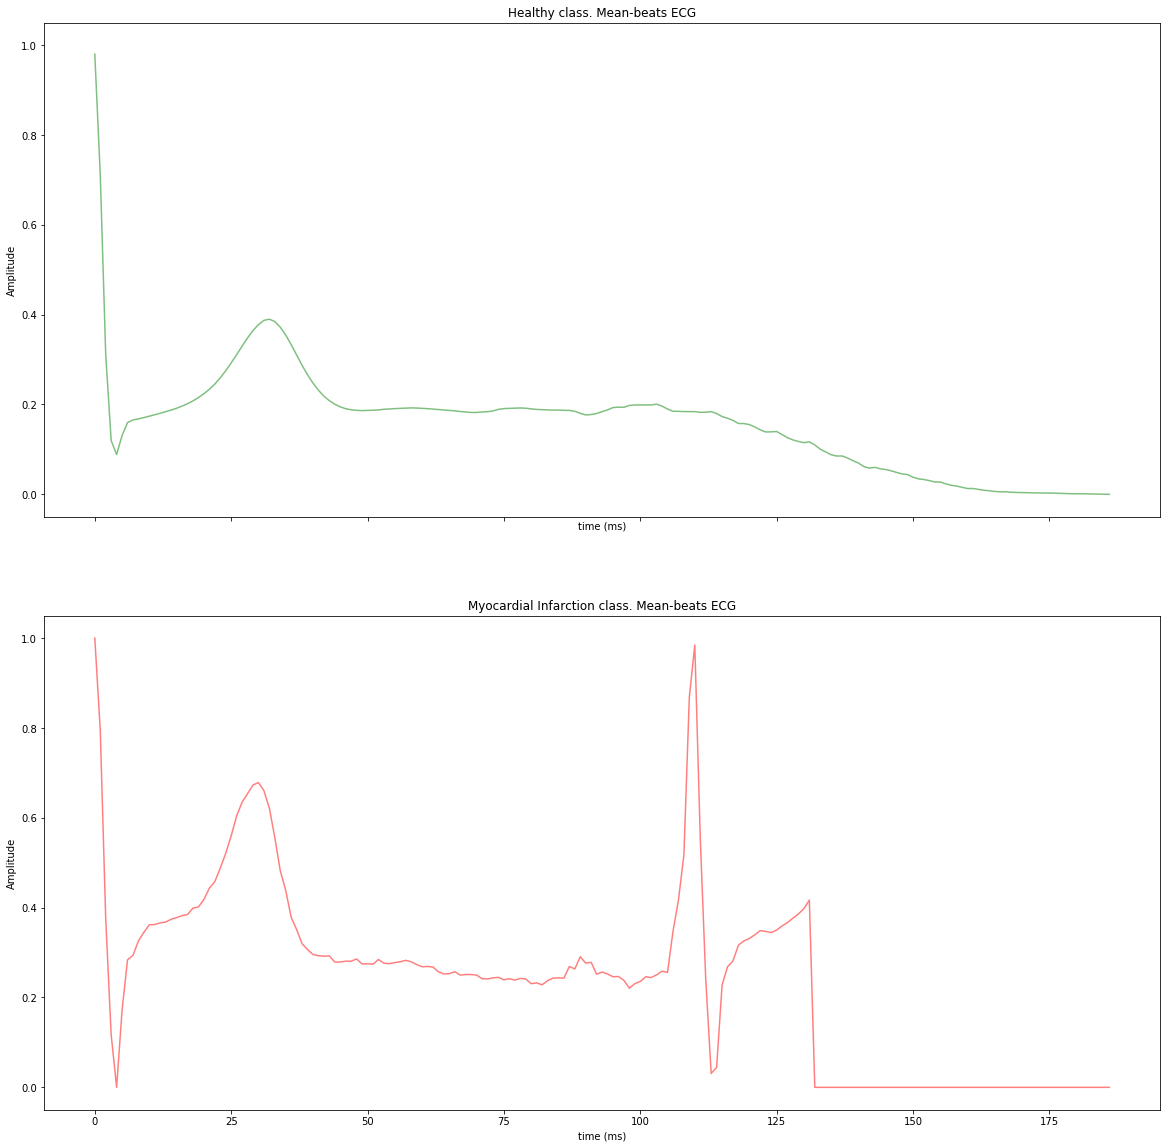

In [12]:
f, ax = plt.subplots(2, sharex=True, sharey=True, figsize=(20,20))

ax[0].set_title("Healthy class. Mean-beats ECG")
ax[0].plot(X_mean_ptbdb_model[0, :], color="green", alpha=.5)
ax[0].set_xlabel('time (ms)')
ax[0].set_ylabel('Amplitude')

ax[1].set_title("Myocardial Infarction class. Mean-beats ECG")
ax[1].plot(X_ptbdb_model[1, :], color="red", alpha=.5)
ax[1].set_xlabel('time (ms)')
ax[1].set_ylabel('Amplitude')

## Análisis visual de cada señal por clase

Se observa que aunque cada clase parece serguir un patrón determinado, la generalización de la misma no es una tarea fácil. Por lo que intuyo dos posibles primeras aproximaciones:
- Deep Learning
- Reducción dimensional y aplicación de otras técnicas de machine learning tipo SVM o Random Forests

Ambas aproximaciones me parecen de gran interés ya que podrían desencadenar en la obtención de un sistema que nos permita escalar el proyecto a cualquier tarea que implique reconocimiento de ECG.

### Arrhytmia Dataset

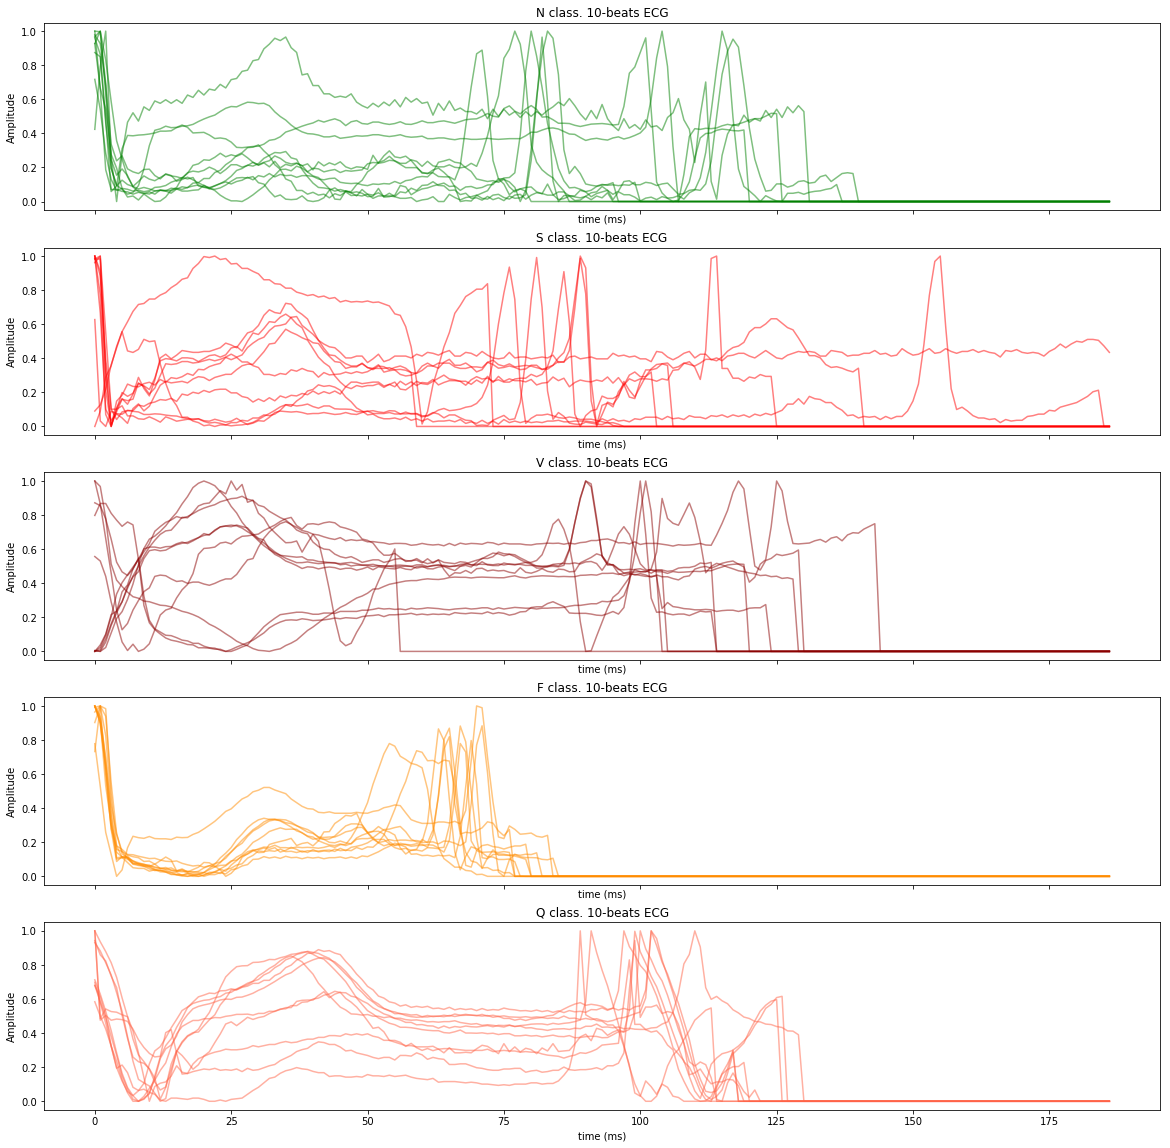

In [13]:
plots_per_class=10

f, ax = plt.subplots(5, sharex=True, sharey=True, figsize=(20,20))

for j in range(plots_per_class):
    ax[0].set_title("N class. {}-beats ECG".format(plots_per_class))
    ax[0].plot(X_mitbih_model[N, :][j], color="green", alpha=.5)
    ax[0].set_xlabel('time (ms)')
    ax[0].set_ylabel('Amplitude')
    
    ax[1].set_title("S class. {}-beats ECG".format(plots_per_class))
    ax[1].plot(X_mitbih_model[S, :][j], color="red", alpha=.5)
    ax[1].set_xlabel('time (ms)')
    ax[1].set_ylabel('Amplitude')
    
    ax[2].set_title("V class. {}-beats ECG".format(plots_per_class))
    ax[2].plot(X_mitbih_model[V, :][j], color="darkred", alpha=.5)
    ax[2].set_xlabel('time (ms)')
    ax[2].set_ylabel('Amplitude')

    ax[3].set_title("F class. {}-beats ECG".format(plots_per_class))
    ax[3].plot(X_mitbih_model[F, :][j], color="darkorange", alpha=.5)
    ax[3].set_xlabel('time (ms)')
    ax[3].set_ylabel('Amplitude')

    ax[4].set_title("Q class. {}-beats ECG".format(plots_per_class))
    ax[4].plot(X_mitbih_model[Q, :][j], color="tomato", alpha=.5)
    ax[4].set_xlabel('time (ms)')
    ax[4].set_ylabel('Amplitude')



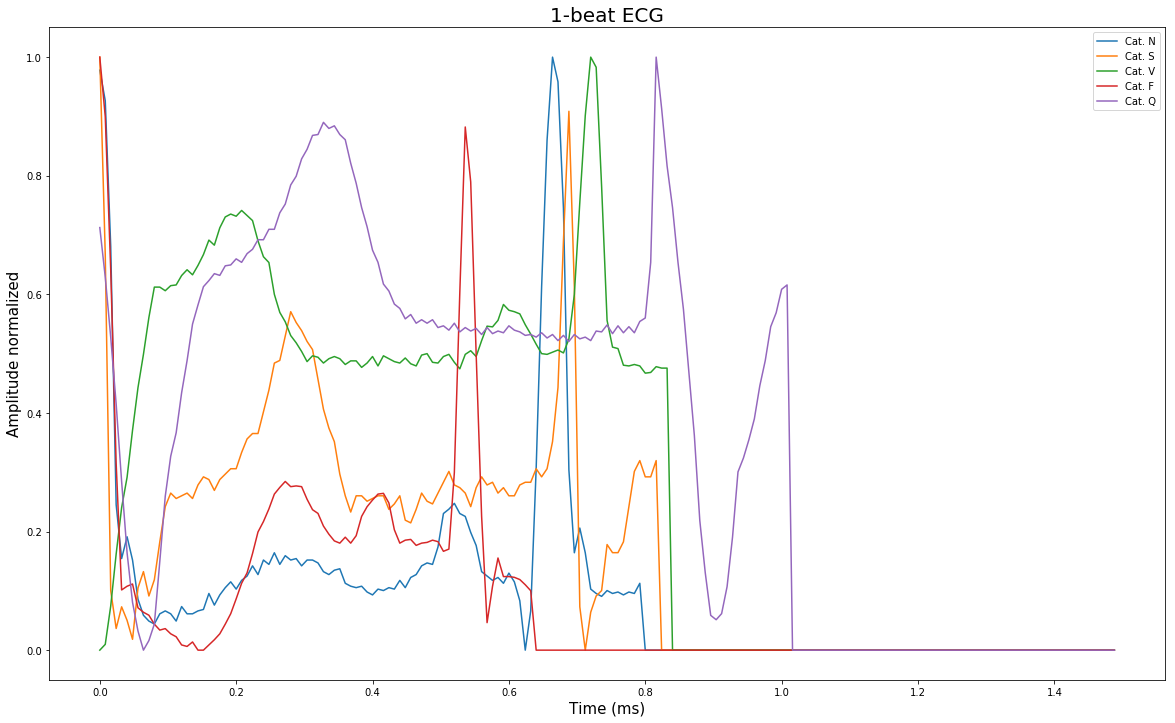

In [14]:
x = np.arange(0, 187)*8/1000

plt.figure(figsize=(20,12))
plt.plot(x, X_mitbih_model[N, :][0], label="Cat. N")
plt.plot(x, X_mitbih_model[S, :][0], label="Cat. S")
plt.plot(x, X_mitbih_model[V, :][0], label="Cat. V")
plt.plot(x, X_mitbih_model[F, :][0], label="Cat. F")
plt.plot(x, X_mitbih_model[Q, :][0], label="Cat. Q")
plt.legend()
plt.title("1-beat ECG", fontsize=20)
plt.ylabel("Amplitude normalized", fontsize=15)
plt.xlabel("Time (ms)", fontsize=15)
plt.show()

### PTB Diagnostic ECG Dataset

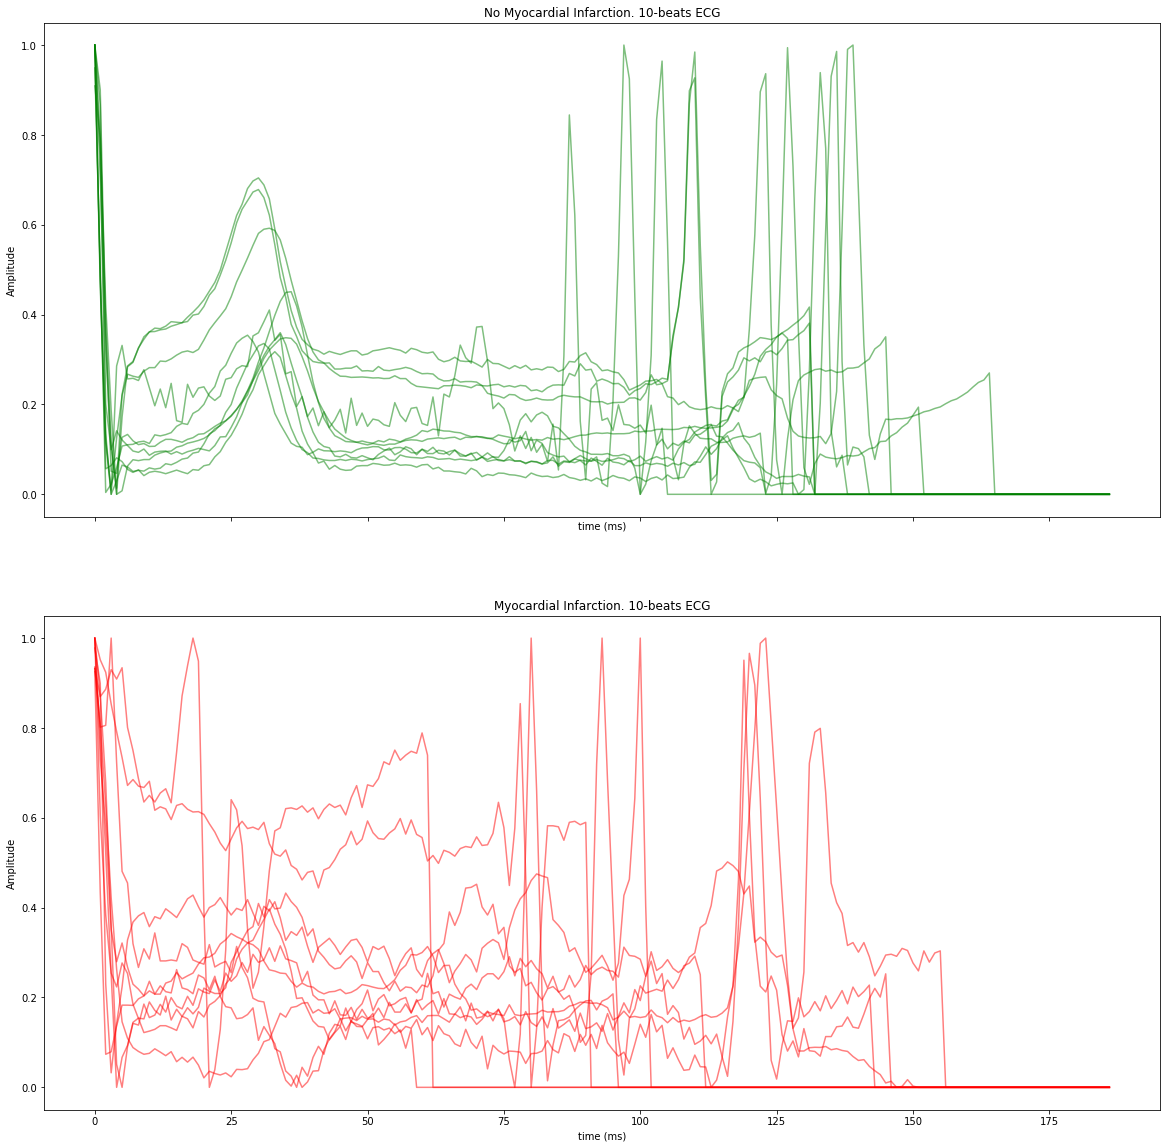

In [15]:
plots_per_class=10

f, ax = plt.subplots(2, sharex=True, sharey=True, figsize=(20,20))

for j in range(plots_per_class):
    ax[0].set_title("No Myocardial Infarction. {}-beats ECG".format(plots_per_class))
    ax[0].plot(X_ptbdb_model[C0, :][j], color="green", alpha=.5)
    ax[0].set_xlabel('time (ms)')
    ax[0].set_ylabel('Amplitude')
    
    ax[1].set_title("Myocardial Infarction. {}-beats ECG".format(plots_per_class))
    ax[1].plot(X_ptbdb_model[C1, :][j], color="red", alpha=.5)
    ax[1].set_xlabel('time (ms)')
    ax[1].set_ylabel('Amplitude')

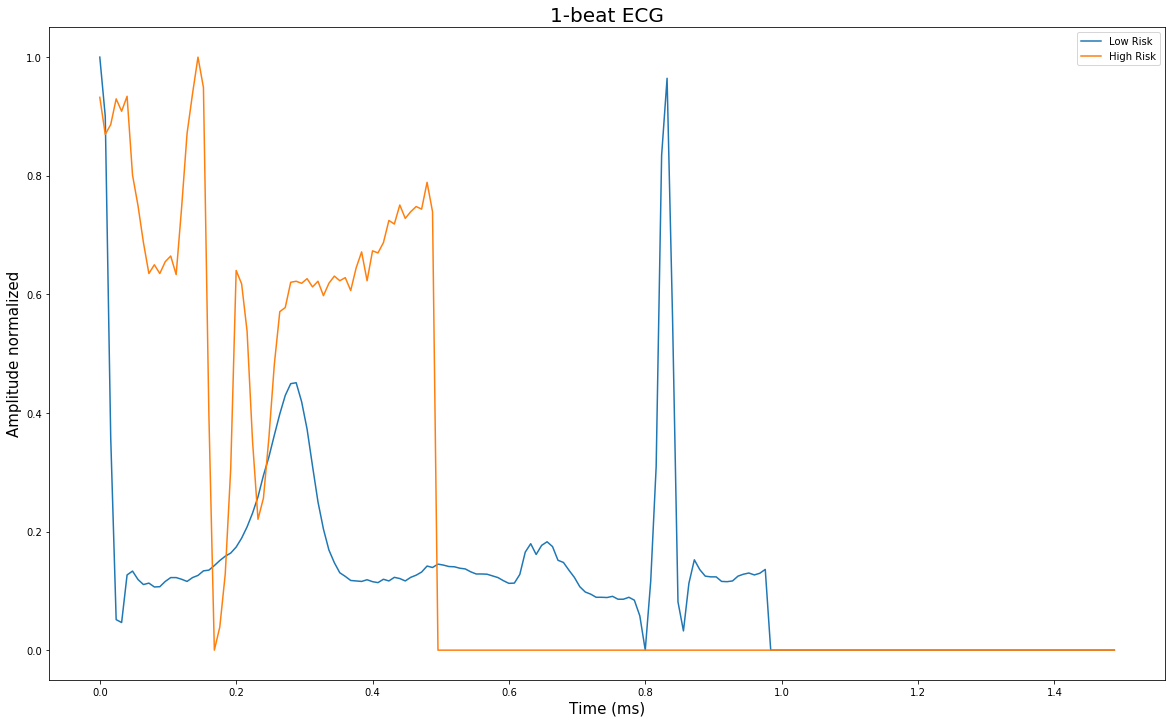

In [16]:
x = np.arange(0, 187)*8/1000
plt.figure(figsize=(20,12))
plt.plot(x, X_ptbdb_model[C0, :][0], label="Low Risk")
plt.plot(x, X_ptbdb_model[C1, :][0], label="High Risk")
plt.legend()
plt.title("1-beat ECG", fontsize=20)
plt.ylabel("Amplitude normalized", fontsize=15)
plt.xlabel("Time (ms)", fontsize=15)
plt.show()

## Búsqueda de patrones entre clases

Para buscar patrones entre clases se va a implementar un algoritmo de aprendizaje no supervisado que clusterice el conjunto de datos, de forma que reduciremos la dimensionalidad a solo dos dimensiones y poder observar dicha clusterización con el fin de tener un último de punto de vista que nos acerque a la elección de la primera aproximación al modelo a utlizar.

CONCLUSIÓN: Debido a la morfología de la clusterización, intuyo que es más razonable el uso de Deep Learning debido a la gran dificultad a la hora de realizar una reducción dimensional y poder distinguir entre clases (Véase las figuras obtenidas mediante el algoritmo de aprendizaje no supervisado). 

Por lo que, las primeras aproximaciones podrían ser:
- Red Neuronal Convolucional Profunda
- Red Recurrente Profunda con configuración LSTM

Gracias a su capacidad de minimización de tamaño por agrupación y por memoria respectivamente.

### Arrhytmia Dataset

In [17]:
from sklearn.manifold import TSNE
n_components = 2
tsne = TSNE(n_components=n_components, init='pca', random_state=0)
Y = tsne.fit_transform(X_mitbih_model)

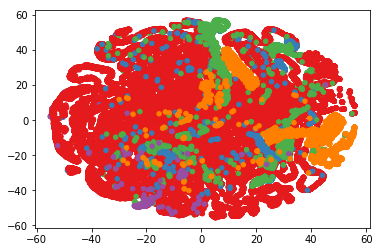

In [18]:
CMAP = plt.get_cmap("Set1")
COLOR = [CMAP(k) for k in range(5)]
NAME_DIC = {k:v for k,v in zip([0,1,2,3,4],['N','S','V','F','Q'])}
color=[COLOR[int(y)] for y in y_mitbih_model]
markersizes = [20 for _ in range(X_mitbih_model.shape[0])]

plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=CMAP, s=markersizes)

### PTB Diagnostic ECG Database

In [19]:
from sklearn.manifold import TSNE
n_components = 2
tsne = TSNE(n_components=n_components, init='pca', random_state=0)
Y = tsne.fit_transform(X_ptbdb_model)

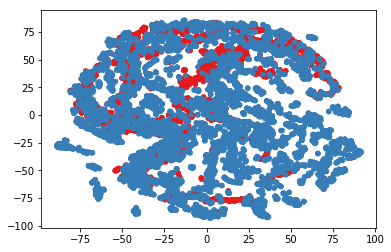

In [20]:
CMAP = plt.get_cmap("Set1")
COLOR = [CMAP(k) for k in range(2)]
NAME_DIC = {k:v for k,v in zip([0,1],['N','MI'])}
color=[COLOR[int(y)] for y in y_ptbdb_model]
markersizes = [20 for _ in range(X_ptbdb_model.shape[0])]

plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=CMAP, s=markersizes)

# Conclusión

Se han obtenido varias conclsiones claras:

- Es posible el desarrollo de un sistema de machine learning que aprenda de estos conjuntos de datos.

- Es necesario el desarrollo de un algoritmo de balanceado de datos artificial que permita igualar las clases de cada uno de los conjuntos de datos para un entrenamiento correcto sin falsear el conjunto de datos.

- La primera aproximación a ese sistema de machine learning será una red neuronal profunda de tipo CNN o LSTM.